In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
sns.set_style('darkgrid')

In [2]:
## name of datasets that are present in seaborn library

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [3]:
data=sns.load_dataset('iris')

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
data.shape

(150, 5)

In [9]:
data['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Text(0, 0.5, 'sepal_width')

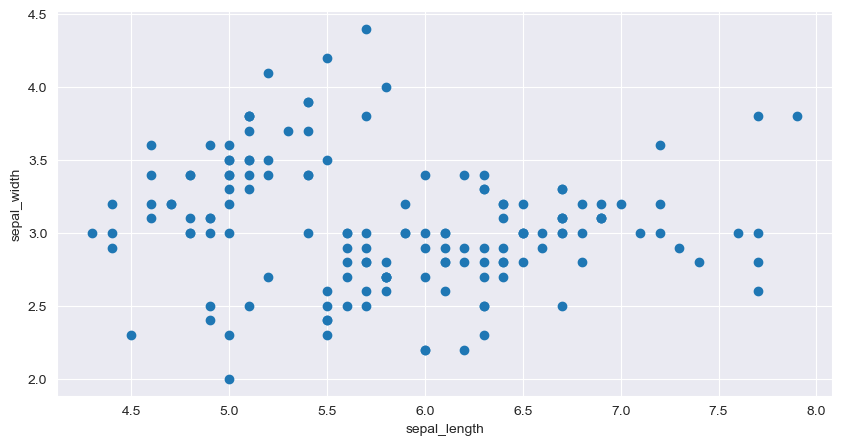

In [10]:
plt.figure(figsize=(10,5))
plt.scatter(x=data['sepal_length'],y=data['sepal_width'])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

In [11]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [12]:
#### converting species into label encoding

def map_species(f):
    if f=='setosa':
        f=0
    elif f=='versicolor':
        f=1
    elif f=='virginica':
        f=2
    return f

In [13]:
data['species']=data.species.map(map_species)
data['species'].unique()

array([0, 1, 2], dtype=int64)

In [14]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


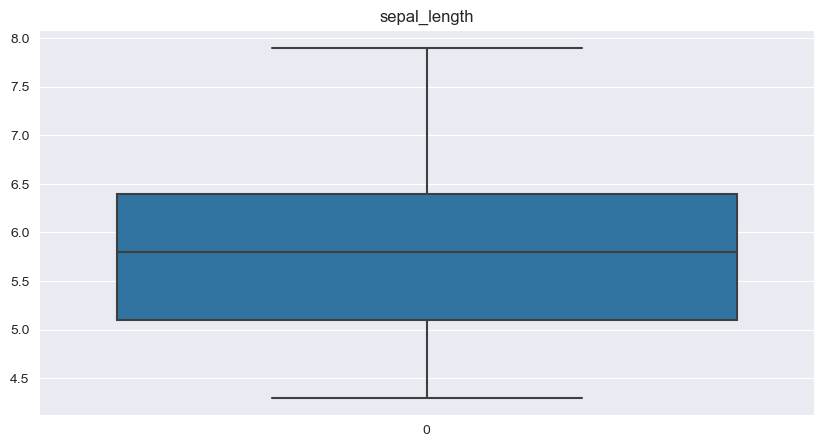

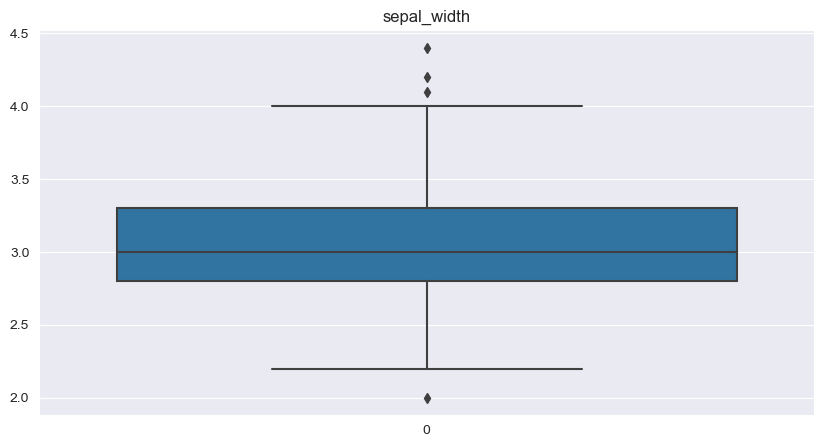

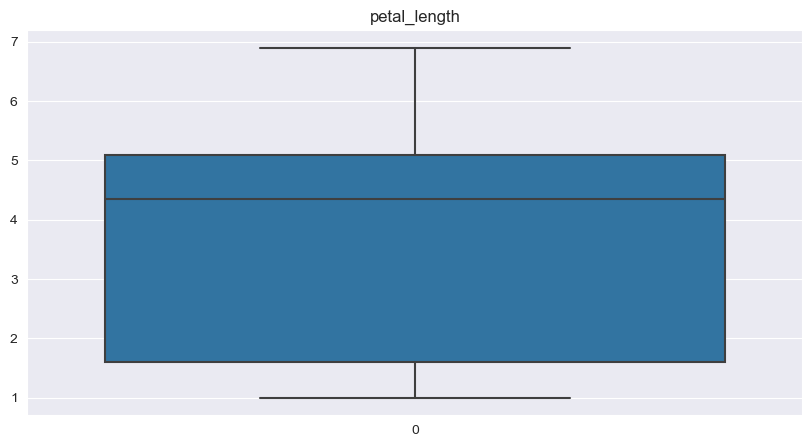

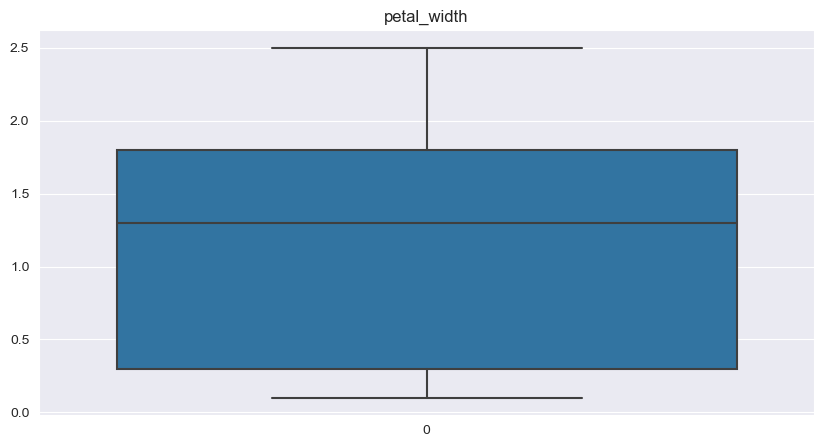

In [15]:
for f in ['sepal_length','sepal_width','petal_length','petal_width']:
   plt.figure(figsize=(10,5))
   sns.boxplot(data[f])
   plt.title(f)

In [16]:
#### independent and dependent variables
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [17]:
#### preprocessing
sc=StandardScaler()
X=sc.fit_transform(X)

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [19]:
lg=LogisticRegression()

In [20]:
lg.fit(X_train,y_train)

LogisticRegression()

In [21]:
pred=lg.predict(X_test)

In [22]:
print("Accuracy_Score")
print(accuracy_score(y_test,pred))

Accuracy_Score
1.0


In [23]:
print("confusion_matrix")
print(confusion_matrix(y_test,pred))

confusion_matrix
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [24]:
print("classification_report")
print(classification_report(y_test,pred))

classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



<Axes: >

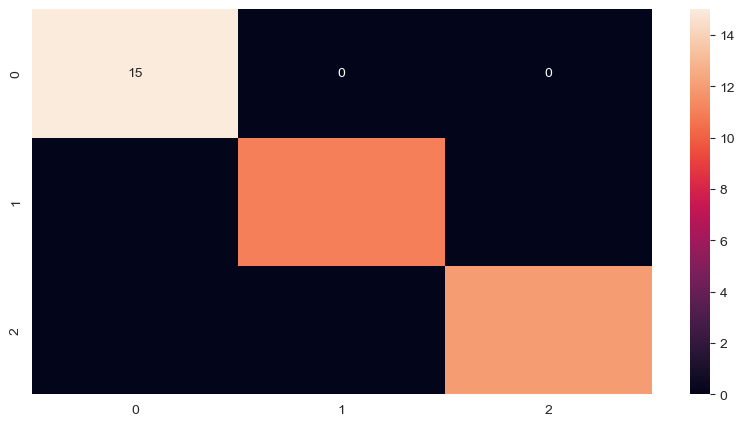

In [25]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [26]:
pd.DataFrame({'Actual': y_test,  'Predicted': pred}).head(50)

,Actual,Predicted
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1
